# Theory
The most straight forward application of the finite difference concept is the **Forward Difference Approximation (FD)**. 

## Definition
The approximation is derived from the **Two Points Stencil**, where it is constructed by the current node and its forward neighboring node.
$$ \begin{equation}
u'(x)|_{x=x_i} \approx \nabla_h^{(1)} = \frac{f(x+h) - f(x)}{h} \end{equation}
$$
<img src="./Resources/FD Approx.png" width="1000">

## Examples
Let $f(x) = 3\sin(x)$ find the finite difference approximation of the first derivative at $x=2$ and compare it with the analytical solution. Consider $h=0.1$

$$
\begin{align*}
\bold{FD:}& \qquad \nabla_h^{(1)} = \frac{3\sin(2.1) - 3\sin(2)}{0.1} = -1.382641\dots\\[10pt]
\bold{Analytical:}& \qquad f'(x) = 3\cos(2) = -1.248440\dots
\end{align*}
$$

## Imports

In [60]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [61]:
domain = [-2,2]
h = 1
func = sp.sin(x)        # use sp. methods only "i.e sp.cos()"

## Algorithm

```mermaid
    flowchart LR
        get_x(Get domain x) --> f_prime(Compute equ.1 on each x)
```

In [62]:
def FD(f: Callable, x: np.ndarray, h: float) -> np.ndarray:
    '''
    Forward finite difference approximation of the derivative for a given function `f`

    Args:
        f: Function to approximate the derivative
        x: Point to evaluate the derivative at
        h: Discretization factor or step size

    Returns:
        Derivative approximation at the given point `x`
    '''
    
    return (f(x+h) - f(x)) / h

### Error Analysis
This investigation aims to illustrate accuracy of the finite difference forward scheme approximation of the derivative. Common error metrics/visualization used are
- Function Plot: The closeness of the FD derivative approximation to the analytical
- Error Scatter: Investigation of error trends and magnitude
- $L_2$ Norm: Quantitative measure of total error
- Mean Squared Error (MSE): Quantitative measure of total error
- Maximum Absolute Error: Quantitative measure on the maximum error

In [63]:
# domain
xx = np.linspace(*domain)
xx_h = np.linspace(*domain, int((domain[1] - domain[0]) / h + 1))

# analytical derivative
func_prime = sp.diff(func)

# parse expressions to lambda
f = (lambda x : np.ones_like(x)*float(func)) if sp.simplify(func).is_constant() else sp.lambdify(x, func) 
f_prime = (lambda x : np.ones_like(x)*float(func_prime)) if sp.simplify(func_prime).is_constant() else sp.lambdify(x, func_prime)

# finite-difference approximation
f_prime_FD = [FD(f, x, h) for x in xx_h]

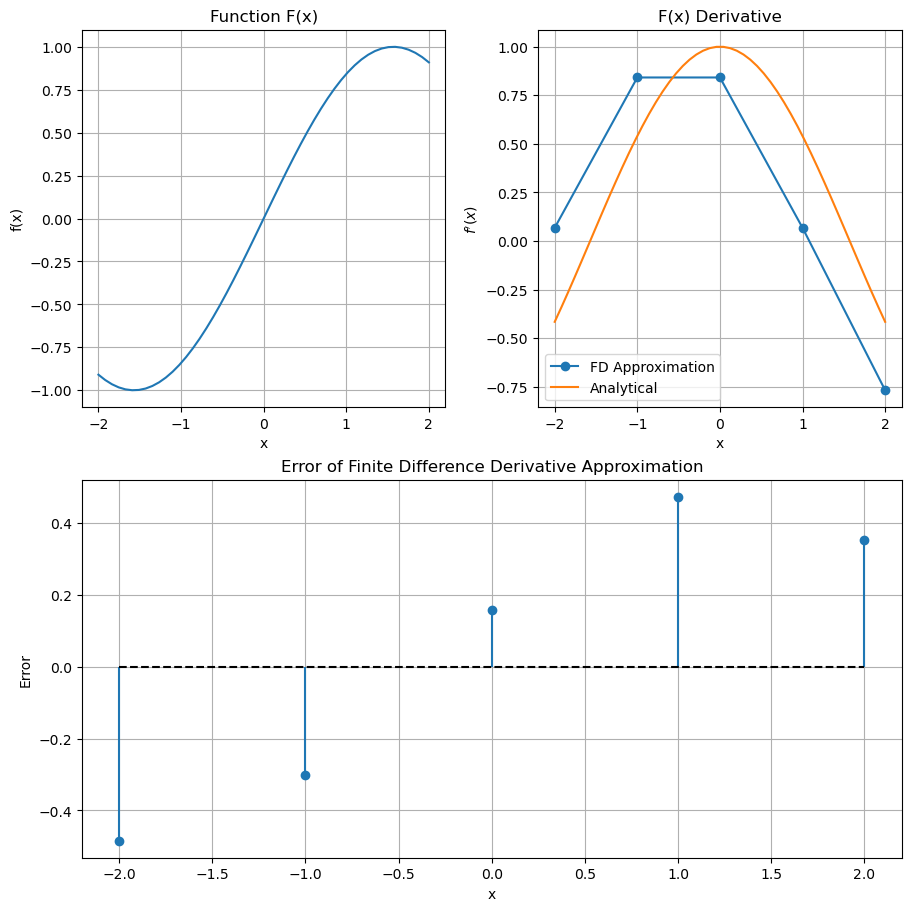

,Property,Quantity
0,l_2 error norm,0.834999
1,mean squared error,0.139445
2,maximum error,0.483973


In [64]:
fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'lower left']],
                              figsize=(9,9), layout="constrained")

# f(x) plot
ax['upper left'].plot(xx, f(xx))
ax['upper left'].set(xlabel="x", ylabel="f(x)", title="Function F(x)")
ax['upper left'].grid(True)

# derivative of f(x) plot
ax['right'].plot(xx_h, f_prime_FD, marker="o", label="FD Approximation")
ax['right'].plot(xx, f_prime(xx), label="Analytical")
ax['right'].set(xlabel="x", ylabel=r"$f'(x)$", title="F(x) Derivative")
ax['right'].legend()
ax['right'].grid(True)

# error
error = f_prime(xx_h) - f_prime_FD
ax['lower left'].stem(xx_h, error, basefmt="k--")
ax['lower left'].set(xlabel="x", ylabel="Error", title="Error of Finite Difference Derivative Approximation")
ax['lower left'].grid(True)


# summary
summary = [
    ("l_2 error norm", np.linalg.norm((error))),
    ("mean squared error", np.mean(abs(error)**2)),
    ("maximum error", np.max(abs(error)))
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df

One can see from the plots above that the **forward difference approximation** tend to **overestimate** the actual derivative in the region where the derivative is going in increasing trend and **underestimate** the actual derivative when the derivative is going in decreasing trend.

### Convergence Analysis
Investigate how the error scale as the step size change $h$ "i.e. the asymptotic change of the error". We will investigate this analytically and experimentally.
- Analytically: This through the definition finite difference that's derived from taylor expansion
- Experimentally: Convergence plot where we trace the error as $h$ changes

#### Analytically
The taylor expansion of $f(x)$ around a shifted location $x = x + h$ where $h \gt 0$
$$\begin{equation*}
f(x + h) = f(x) + \frac{h}{1!}f^\prime(x) + \frac{h^2}{2!}f^{\prime\prime}(x) + \dots + \frac{h^n}{n!}f^{(n)}(x) \end{equation*} \\
$$

Rearranging the terms, one can see that the forward difference approximation *"one the left hand side"*
$$
\begin{equation*}
\Longrightarrow \frac{f(x + h) - f(x)}{h} = f^\prime(x) \;\; \underbrace{+ \frac{h}{2!}f^{\prime\prime}(x) + \dots + \frac{h^n}{n!}f^{(n)}(x)}_{O(h)}
\end{equation*}
$$
We can see from the right hand side that forward difference is an approximation with error of order $O(h)$ "i.e. first-order accurate".

#### Experimentally 
@TODO

In [65]:
H = np.geomspace(1e-4, 1, num=20) 

errors=[]
for h_i in H:
    error = f_prime(2) - FD(f, 2, h_i)
    errors.append(abs(error))

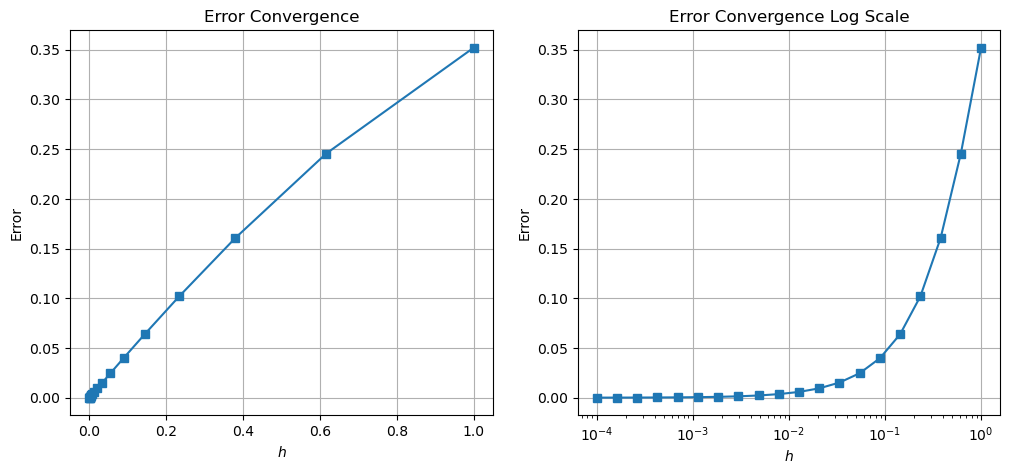

In [66]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# convergence
ax[0].plot(H, errors, marker="s")
ax[0].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence")
ax[0].grid(True)

# convergence log scale
ax[1].plot(H, errors, marker="s")
ax[1].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence Log Scale", xscale="log")
ax[1].grid(True)

plt.show()

### Stability and Oscillations

In [67]:
cond = lambda x: (x * np.arccos(x)**2) / np.tan(x)

cond(np.pi/2)

/var/folders/3w/hd5h2k7x1vj43929dpnp39p40000gn/T/ipykernel_80273/4072202941.py:1: RuntimeWarning: invalid value encountered in arccos
  cond = lambda x: (x * np.arccos(x)**2) / np.tan(x)


nan